import library ges, python ga import ga makan

In [2]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#untuk tokenisasi kata kata
from nltk.util import ngrams
# Sepertinya belum akan digunakan
import re
# regular expression

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# sastrawi fynshit
import pandas as pd
# masih bingung kenapa namanya pandas
import sys


pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

sys.setrecursionlimit(10000)



[nltk_data] Downloading package punkt to
[nltk_data]     /home/wahyusetiawan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/wahyusetiawan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wahyusetiawan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dictionary #antibahasagaul


In [3]:
def tokenpenghilangbahasagaul(tokens, normalization_dict):
    return [normalization_dict.get(t, t) for t in tokens]

jarviskamus = {
    'mantul': 'mantap',
    'kuy': 'yuk',
    'gercep': 'cepat',
    'kepo': 'ingin tahu',
    'kolot': 'kuno',
    'tolol': 'bodoh',
    'goblok': 'bodoh',
    'anjing': 'keparat',
    'anjlok': 'jatuh',
    'baper': 'terbawa perasaan',
    'bgt': 'banget',
    'btw': 'omong-omong',
    'tp': 'tapi',
    'bgs': 'bagus',
    'anjay': 'hebat',
    'jn' : 'jangan',
    'jawir' : 'jelek',
    'hdd' : 'harddisk',
    'ssd' : 'solid state drive',
    'jd' : 'jadi',
    'dgn' : 'dengan',
    'oke' : 'baik',
    'ok' : 'baik',
    'okey' : 'baik',
    'kak' : 'kakak',
    
}

Cleaning komentar

In [4]:
#menghapus simbol dan symlink yang tidak diperlukan
def membersihkan_teks(teks):
    # Hapus URL
    teks = re.sub(r'http\S+|www\S+|https\S+', '', teks, flags=re.MULTILINE)
    # 2025 masih pake hastag? gajaman
    teks = re.sub(r'\@\w+|\#','', teks)
    # Hapus angka dan simbol
    teks = re.sub(r'[^A-Za-z\s]', '', teks)
    # Hapus spasi tangan tremor kok main sosmed
    teks = re.sub(r'\s+', ' ', teks).strip()
    return teks
# membersihkan emoji
import re

def remove_emoji(text):
    emoji_pattern = re.compile(
        "[" 
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # dingbats
        "\U0001F900-\U0001F9FF"  # supplemental symbols
        "\U0001FA70-\U0001FAFF"  # more emojis
        "\U00002600-\U000026FF"  # misc symbols
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub("", text)

# menghapus kata dengan kelebihan yang ditulis kera tidak berpendidikan
def hapushurufberulang(teks):
    return re.sub(r'(.)\1{2,}', r'\1\1', teks)

Tokenisasi  teks biar bisa jadi array

In [5]:
def tokenisasi_teks(teks):
    tokens = word_tokenize(teks)
    return tokens

menghapus stopword dengan nltk

In [6]:

from nltk.corpus import stopwords


# melakukan cek apakah bahasa indonesia ada di stopwords, bagaimana cara kerjanya? entahlah
print("indonesian" in stopwords.fileids())
#print semua stopword yang ada dalam bahasa indonesia
from nltk.corpus import stopwords
print(len(stopwords.words("indonesian")))
print(stopwords.words("indonesian")[:20])

#deklarasi array stopword bahasa indonesia
stopwords_indonesia = set(stopwords.words("indonesian"))
stopwords_indonesia.update(["anjir", "banget", "wkwk"])

def menghilangkanstopwords(tokens):
    return [t for t in tokens if t not in stopwords_indonesia]



True
758
['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


stemming

In [7]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return [stemmer.stem(t) for t in tokens]

cek vga anjay kok gak jalan

import dan Pengecekan csv


In [8]:
#aduh lali 

dfcekcsv = pd.read_csv("shopee_reviews.csv")

kualitasyangdicek = dfcekcsv[["nama", "review"]]

# Info info dasar dari dataset
print("\n")
print("besar 2 dimensi csv")
print(kualitasyangdicek.shape)      # rows x columns

# nama kolom dan tipe data
print("\n")
print("nama kolom dan tipe data")
print(kualitasyangdicek.columns)     # column names

# type data
print("\n")
print("tipe data setiap kolom")
print(kualitasyangdicek.dtypes) 

# mengecek missing value
print("\n")
print("Cek missing value:")
print(
    kualitasyangdicek['review'].isna().sum() +
    (kualitasyangdicek['review'].astype(str).str.strip() == "").sum()
)

#mengecek duplikat anjay
print("\n")
print("total duplikat yang ada", kualitasyangdicek.duplicated().sum(), "baris yag sama")    

# mengecek ada berapa kata
print("\n")
print("jumlah kata pada kolom review")
print(kualitasyangdicek['review'].apply(lambda x: len(str(x).split())).sum())
# cek ada berapa kata pada kolom review





besar 2 dimensi csv
(1514, 2)


nama kolom dan tipe data
Index(['nama', 'review'], dtype='object')


tipe data setiap kolom
nama      object
review    object
dtype: object


Cek missing value:
223


total duplikat yang ada 62 baris yag sama


jumlah kata pada kolom review
13379


looping untuk csv


In [9]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.sysconfig.get_build_info())



gpus = tf.config.list_physical_devices('GPU')

if gpus:
    gpu_name = tf.config.experimental.get_device_details(gpus[0]).get('device_name', 'Unknown GPU')
    print(f"GPU name : {gpu_name} ")
else:
    print("😢 No GPU detected.")

#cool progress bar frfr
from tqdm import tqdm
tqdm.pandas()

def preprocess_teks(teks, normalization_dict):
    teks = teks.lower()
    teks_bersih = membersihkan_teks(teks)
    teks_bersih = remove_emoji(teks_bersih)
    teks_bersih = hapushurufberulang(teks_bersih)
    tokens = tokenisasi_teks(teks_bersih)
    tokens = tokenpenghilangbahasagaul(tokens, normalization_dict)
    tokens = menghilangkanstopwords(tokens)
    tokens = stemming(tokens)
    return tokens

df = pd.read_csv("shopee_reviews.csv")


df["preprocessedreview"] = df["review"].progress_apply(
    lambda x: preprocess_teks(str(x), jarviskamus)
)


# Membuat df baru dan membuang kolom yang tidak diperlukan
dfbaru = df[["nama", "preprocessedreview"]]

dfbaru.to_csv("datasethasil_preprocessed.csv", index=False)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
OrderedDict([('cpu_compiler', 'clang 18'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])
GPU name : NVIDIA GeForce RTX 3060 


100%|██████████| 1514/1514 [01:49<00:00, 13.87it/s]


Analisa 

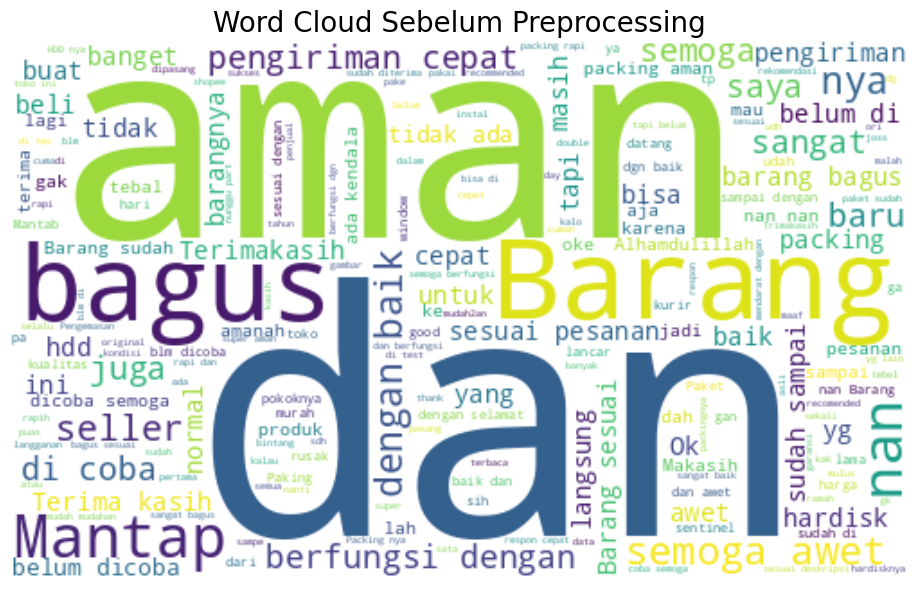

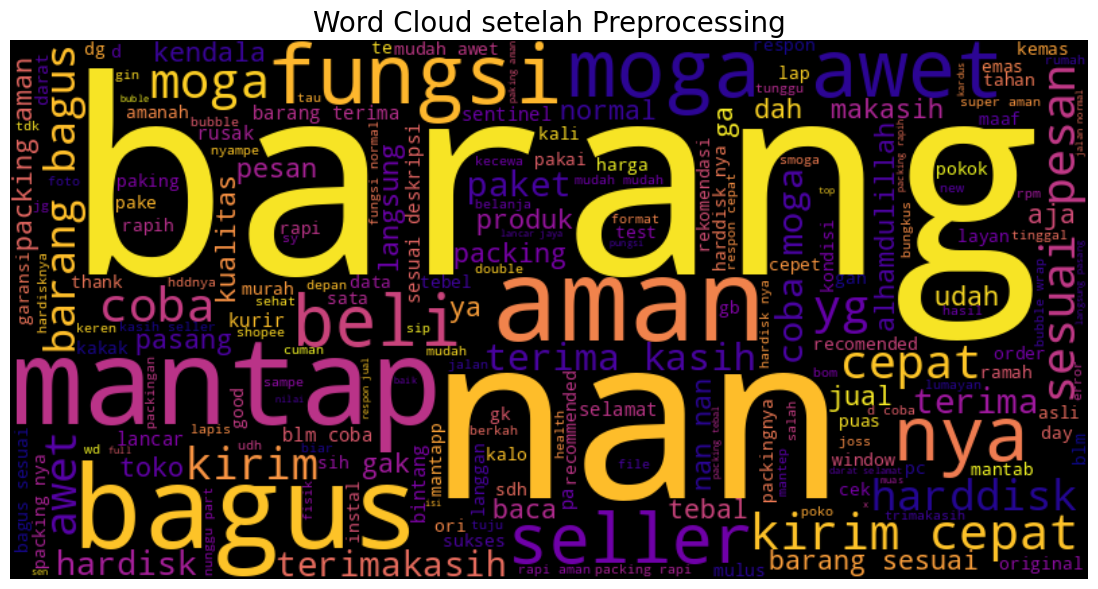

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


dfwc = pd.read_csv("shopee_reviews.csv")

text_before = " ".join(df['review'].astype(str))


wc_before = WordCloud(width=500, height=300, background_color='white', colormap='viridis').generate(text_before)

# Plot
plt.figure(figsize=(15, 7))
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sebelum Preprocessing", fontsize=20)
plt.show()



text_after = " ".join(dfbaru['preprocessedreview'].apply(lambda x: " ".join(x) if isinstance(x, list) else ""))

wc_after = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(text_after)

plt.figure(figsize=(15, 7))
plt.imshow(wc_after, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud setelah Preprocessing", fontsize=20)
plt.show()


In [11]:
#mencari top 20 kata sesuai preprocessed
from collections import Counter
all_tokens = [token for sublist in dfbaru['preprocessedreview'] for token in sublist]
token_counts = Counter(all_tokens)
top_20_tokens = token_counts.most_common(20)
print("Top 20 kata setelah preprocessing:")
for token, count in top_20_tokens:
    print(f"{token}: {count}")

Top 20 kata setelah preprocessing:
barang: 350
moga: 259
nan: 223
bagus: 221
awet: 207
aman: 199
sesuai: 181
coba: 173
cepat: 169
kirim: 152
nya: 145
mantap: 143
fungsi: 135
terima: 131
packing: 122
pesan: 116
seller: 103
beli: 94
harddisk: 81
kasih: 74


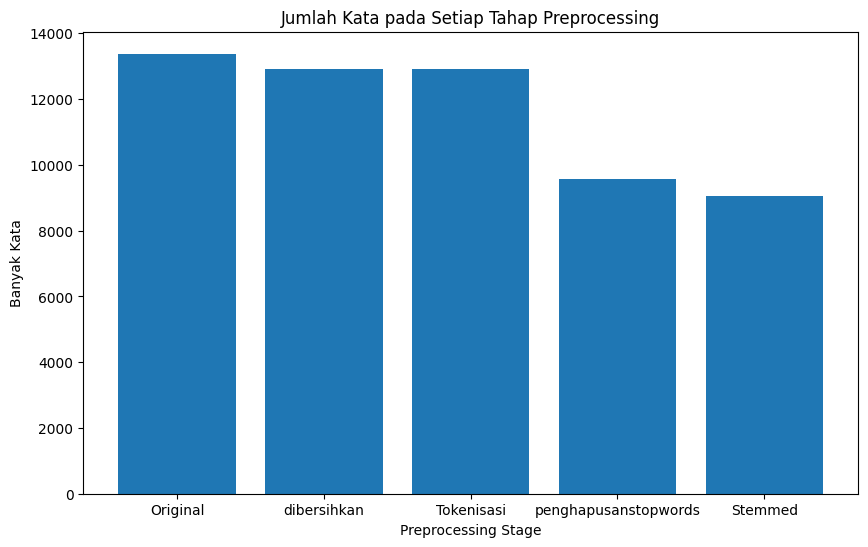

In [12]:
import matplotlib.pyplot as plt

stages = ['Original', 'dibersihkan', 'Tokenisasi', 'penghapusanstopwords', 'Stemmed']
word_counts = []

for stage in stages:
    if stage == 'Original':
        text_list = df['review'].astype(str).tolist()

    elif stage == 'dibersihkan':
        text_list = df['review'].astype(str).apply(membersihkan_teks).tolist()

    elif stage == 'Tokenisasi':
        text_list = df['review'].astype(str).apply(
            lambda x: tokenisasi_teks(membersihkan_teks(x))
        ).tolist()

    elif stage == 'penghapusanstopwords':
        text_list = df['review'].astype(str).apply(
            lambda x: menghilangkanstopwords(
                tokenisasi_teks(
                    membersihkan_teks(x)
                )
            )
        ).tolist()

    elif stage == 'Stemmed':
        # assuming this is a list of tokens per row
        text_list = dfbaru['preprocessedreview'].tolist()

    total_words = sum(
        len(t.split()) if isinstance(t, str) else len(t)
        for t in text_list
    )
    word_counts.append(total_words)

plt.figure(figsize=(10, 6))
plt.bar(stages, word_counts)
plt.xlabel('Preprocessing Stage')
plt.ylabel('Banyak Kata')
plt.title('Jumlah Kata pada Setiap Tahap Preprocessing')
plt.show()


In [13]:
def ringkasan(text_list, nama_tahap):
    # Pastikan list string untuk hitung karakter
    text_as_str = []
    total_words = 0
    word_counts = []

    for t in text_list:
        if isinstance(t, list):  
            words = t
            s = " ".join(words)
        else:
            s = str(t)
            words = s.split()

        text_as_str.append(s)
        word_counts.append(len(words))
        total_words += len(words)

    lengths = [len(t) for t in text_as_str]

    print(f"{nama_tahap}:")
    print(f"Jumlah baris: {len(text_as_str)}")
    print(f"Total kata: {total_words}")
    print(f"Rata-rata kata per dokumen: {sum(word_counts)/len(word_counts):.2f}")
    print(f"Panjang (karakter) rata-rata: {sum(lengths)/len(lengths):.2f}")
    print(f"Karakter terpendek: {min(lengths)}")
    print(f"Karakter terpanjang: {max(lengths)}")
    print()


# apply ringkasan untuk setiap tahap
raw = df["review"].astype(str).tolist()
ringkasan(raw, "Data Mentah")

cleaned = df["review"].astype(str).apply(membersihkan_teks).tolist()
ringkasan(cleaned, "Setelah Membersihkan")

no_emoji = df["review"].astype(str).apply(
    lambda x: remove_emoji(membersihkan_teks(x))
).tolist()
ringkasan(no_emoji, "Setelah Remove Emoji")

no_redup = df["review"].astype(str).apply(
    lambda x: hapushurufberulang(remove_emoji(membersihkan_teks(x)))
).tolist()
ringkasan(no_redup, "Setelah Hapus Huruf Berulang")

tokenized = df["review"].astype(str).apply(
    lambda x: tokenisasi_teks(
        hapushurufberulang(
            remove_emoji(
                membersihkan_teks(x)
            )
        )
    )
).apply(lambda tokens: " ".join(tokens)).tolist()
ringkasan(tokenized, "Setelah Tokenisasi")

slang_fixed = df["review"].astype(str).apply(
    lambda x: tokenpenghilangbahasagaul(
        tokenisasi_teks(
            hapushurufberulang(
                remove_emoji(
                    membersihkan_teks(x)
                )
            )
        ),
        jarviskamus
    )
).apply(lambda tokens: " ".join(tokens)).tolist()
ringkasan(slang_fixed, "Setelah Normalisasi Bahasa Gaul")

stop_removed = df["review"].astype(str).apply(
    lambda x: menghilangkanstopwords(
        tokenpenghilangbahasagaul(
            tokenisasi_teks(
                hapushurufberulang(
                    remove_emoji(
                        membersihkan_teks(x)
                    )
                )
            ),
            jarviskamus
        )
    )
).apply(lambda tokens: " ".join(tokens)).tolist()
ringkasan(stop_removed, "Setelah Stopword Removal")

stemmed = df["review"].astype(str).apply(
    lambda x: stemming(
        menghilangkanstopwords(
            tokenpenghilangbahasagaul(
                tokenisasi_teks(
                    hapushurufberulang(
                        remove_emoji(
                            membersihkan_teks(x)
                        )
                    )
                ),
                jarviskamus
            )
        )
    )
).apply(lambda tokens: " ".join(tokens)).tolist()
ringkasan(stemmed, "Setelah Stemming")





Data Mentah:
Jumlah baris: 1514
Total kata: 13379
Rata-rata kata per dokumen: 8.84
Panjang (karakter) rata-rata: 56.22
Karakter terpendek: 1
Karakter terpanjang: 597

Setelah Membersihkan:
Jumlah baris: 1514
Total kata: 12906
Rata-rata kata per dokumen: 8.52
Panjang (karakter) rata-rata: 53.44
Karakter terpendek: 0
Karakter terpanjang: 550

Setelah Remove Emoji:
Jumlah baris: 1514
Total kata: 12906
Rata-rata kata per dokumen: 8.52
Panjang (karakter) rata-rata: 53.44
Karakter terpendek: 0
Karakter terpanjang: 550

Setelah Hapus Huruf Berulang:
Jumlah baris: 1514
Total kata: 12906
Rata-rata kata per dokumen: 8.52
Panjang (karakter) rata-rata: 53.35
Karakter terpendek: 0
Karakter terpanjang: 550

Setelah Tokenisasi:
Jumlah baris: 1514
Total kata: 12906
Rata-rata kata per dokumen: 8.52
Panjang (karakter) rata-rata: 53.35
Karakter terpendek: 0
Karakter terpanjang: 550

Setelah Normalisasi Bahasa Gaul:
Jumlah baris: 1514
Total kata: 12910
Rata-rata kata per dokumen: 8.53
Panjang (karakter) r

Visualisasi step by step dengan satu data acak

In [14]:
import random

# ambil 1 sample random
sample = df['review'].astype(str).sample(1).iloc[0]

print("=== ORIGINAL ===")
print(sample)

# 1. Casefolding
step1 = sample.lower()
print("\n=== CASEFOLDING ===")
print(step1)

# 2. Membersihkan teks
step2 = membersihkan_teks(step1)
print("\n=== BERSIH ===")
print(step2)

# 3. Remove emoji
step3 = remove_emoji(step2)
print("\n=== TANPA EMOJI ===")
print(step3)

# 4. Hapus huruf berulang
step4 = hapushurufberulang(step3)
print("\n=== HAPUS HURUF BERULANG ===")
print(step4)

# 5. Tokenisasi
step5 = tokenisasi_teks(step4)
print("\n=== TOKENISASI ===")
print(step5)

# 6. Normalisasi gaul
step6 = tokenpenghilangbahasagaul(step5, jarviskamus)
print("\n=== NORMALISASI GAUL ===")
print(step6)

# 7. Stopword removal
step7 = menghilangkanstopwords(step6)
print("\n=== TANPA STOPWORDS ===")
print(step7)

# 8. Stemming
step8 = stemming(step7)
print("\n=== STEMMING ===")
print(step8)

# 9. FINAL RESULT
print("\n=== HASIL AKHIR ===")
print(step8)


=== ORIGINAL ===
Mantapppp,,, semoga aweett👍🏻👍🏻👍🏻👍🏻
Cuma klo bisa bubble wrapnya bagian luar lebih tebal lagi boss,, hdd rawan getaran soalnya👍🏻👍🏻👍🏻

=== CASEFOLDING ===
mantapppp,,, semoga aweett👍🏻👍🏻👍🏻👍🏻
cuma klo bisa bubble wrapnya bagian luar lebih tebal lagi boss,, hdd rawan getaran soalnya👍🏻👍🏻👍🏻

=== BERSIH ===
mantapppp semoga aweett cuma klo bisa bubble wrapnya bagian luar lebih tebal lagi boss hdd rawan getaran soalnya

=== TANPA EMOJI ===
mantapppp semoga aweett cuma klo bisa bubble wrapnya bagian luar lebih tebal lagi boss hdd rawan getaran soalnya

=== HAPUS HURUF BERULANG ===
mantapp semoga aweett cuma klo bisa bubble wrapnya bagian luar lebih tebal lagi boss hdd rawan getaran soalnya

=== TOKENISASI ===
['mantapp', 'semoga', 'aweett', 'cuma', 'klo', 'bisa', 'bubble', 'wrapnya', 'bagian', 'luar', 'lebih', 'tebal', 'lagi', 'boss', 'hdd', 'rawan', 'getaran', 'soalnya']

=== NORMALISASI GAUL ===
['mantapp', 'semoga', 'aweett', 'cuma', 'klo', 'bisa', 'bubble', 'wrapnya', 'bagia

visualisasi 20 data random before/after

In [15]:


def preprocess_pipeline(text, normalization_dict):
    # Step 1: original
    original = str(text)

    # Step 2: cleaning
    cleaned = membersihkan_teks(original.lower())
    cleaned = remove_emoji(cleaned)
    cleaned = hapushurufberulang(cleaned)

    # Step 3: tokenized + normalized
    tokens = tokenisasi_teks(cleaned)
    normalized = tokenpenghilangbahasagaul(tokens, normalization_dict)
    normalized_join = " ".join(normalized)

    # Step 4: final step
    stop_removed = menghilangkanstopwords(normalized)
    stemmed = stemming(stop_removed)
    final_join = " ".join(stemmed)

    return original, cleaned, normalized_join, final_join


# ambil 20 data random
sample_df = df.sample(20, random_state=42)

rows = []

for text in sample_df["review"]:
    o, c, n, f = preprocess_pipeline(text, jarviskamus)
    rows.append([o, c, n, f])

tabel = pd.DataFrame(rows, columns=[
    "Original",
    "Cleaned",
    "Tokenized+Normalized",
    "Final (Stopword+Stemming)"
])

tabel


,Original,Cleaned,Tokenized+Normalized,Final (Stopword+Stemming)
0,paket sudah sya terima dan sudah d pasang alhamdllh berpungsi denagan baik.paking sangat rapih dan aman toko nya amanah.pengiriman sangat cepat kurir sangat ramah.sudah langana.nek berikut nya bisa buat langganan ok poko nya👍👍👍,paket sudah sya terima dan sudah d pasang alhamdllh berpungsi denagan baikpaking sangat rapih dan aman toko nya amanahpengiriman sangat cepat kurir sangat ramahsudah langananek berikut nya bisa buat langganan ok poko nya,paket sudah sya terima dan sudah d pasang alhamdllh berpungsi denagan baikpaking sangat rapih dan aman toko nya amanahpengiriman sangat cepat kurir sangat ramahsudah langananek berikut nya bisa buat langganan baik poko nya,paket sya terima d pasang alhamdllh pungsi denagan baikpaking rapih aman toko nya amanahpengiriman cepat kurir ramahsudah langananek nya langgan poko nya
1,"Barang sesuai gambar, pas dicek di hdd sentinel. Keadaan 0 days pemakaian, jossss",barang sesuai gambar pas dicek di hdd sentinel keadaan days pemakaian joss,barang sesuai gambar pas dicek di harddisk sentinel keadaan days pemakaian joss,barang sesuai gambar pas cek harddisk sentinel days pakai joss
2,nan,nan,nan,nan
3,Sesuai pesanan. Lupa bilang partisi harddisk nya.,sesuai pesanan lupa bilang partisi harddisk nya,sesuai pesanan lupa bilang partisi harddisk nya,sesuai pesan lupa bilang partisi harddisk nya
4,Alhamdulillah paket sampai dengan selamat dan bagus dan berfungsi dengan baik.\nTerima kasih reseller moga awet,alhamdulillah paket sampai dengan selamat dan bagus dan berfungsi dengan baik terima kasih reseller moga awet,alhamdulillah paket sampai dengan selamat dan bagus dan berfungsi dengan baik terima kasih reseller moga awet,alhamdulillah paket selamat bagus fungsi terima kasih reseller moga awet
5,nan,nan,nan,nan
6,Berfungsi dengan baik,berfungsi dengan baik,berfungsi dengan baik,fungsi
7,Hardisk wd yang baik untuk program maupun data.,hardisk wd yang baik untuk program maupun data,hardisk wd yang baik untuk program maupun data,hardisk wd program data
8,nan,nan,nan,nan
9,Sesuai dgn pesanan thx,sesuai dgn pesanan thx,sesuai dengan pesanan thx,sesuai pesan thx
